In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
cov = [[5, 0], [0, 5]]
x = np.random.multivariate_normal([2, 2], cov, 1500)

In [ ]:
print(len(x))
print(x.shape[1])

9
2


In [ ]:
orig_labels = np.asarray([0]*300 + [1]*300 + [2]*300 + [3]*300 + [4]*300).T

[0 0 0 1 1 1 2 2 2]


[]


In [ ]:

def kmeans_display(x, label):
  k = np.amax(label) + 1
  x0 = x[label == 0, :]
  x1 = x[label == 1, :]
  x2 = x[label == 2, :]
  x3 = x[label == 3, :]
  x4 = x[label == 4, :]
  plt.plot(x0[:, 0], x0[:, 1], 'b^', markersize = 4, alpha = .8)
  plt.plot(x1[:, 0], x1[:, 1], 'go', markersize = 4, alpha = .8)
  plt.plot(x2[:, 0], x2[:, 1], 'rs', markersize = 4, alpha = .8)
  plt.plot(x3[:, 0], x3[:, 1], 'd', markersize = 4, alpha = .8)
  plt.plot(x4[:, 0], x4[:, 1], 's', markersize = 4, alpha = .8)
  plt.axis('equal')
  plt.plot()
  plt.show() 

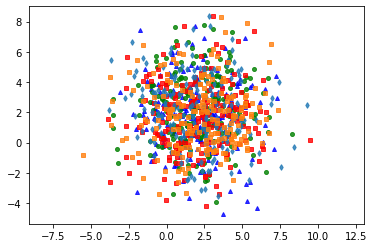

In [ ]:
kmeans_display(x, orig_labels)

In [ ]:
def kmeans_init_centers(x, k):
  return x[np.random.choice(x.shape[0], k, replace = False)]

In [ ]:
k = 5

In [ ]:
a = kmeans_init_centers(x, k)
print(a)
print(a[0])

[[ 2.44670278 -1.93988472]
 [-0.24376871  0.32371034]
 [ 0.55616204  4.63786318]
 [ 9.29309946  2.45012115]
 [ 3.95894059  5.32937698]]
[ 2.44670278 -1.93988472]


In [ ]:
def kmeans_assign_labels(x, center):
  kc = []
  # tinh khoang cach tung diem den cac center
  for i in range(0, len(x)):
    kc1 = []
    for j in range(0, len(center)):
      kc1.append(math.dist(x[i], center[j]))
    kc.append(kc1)
  kc = np.resize(kc, (len(x),len(center)))
  new_label = []
  # tim gia tri khoang cach nho nhat
  # gan diem ay voi k/c den center nho nhat
  for i in range(0, len(x)):
      array = kc[i]
      min = array[0]
      vt = 0
      for j in range(1, len(array)):
        if min > array[j]:
          min = array[j]
          vt = j
      new_label.append(vt)
  new_label = np.array(new_label)
  return new_label


In [ ]:

# new_label = []
# for i in range(0, len(x)):
#     array = kc[i]
#     min = array[0]
#     vt = 0
#     for j in range(1, len(a)):
#       if min > array[j]:
#         min = array[j]
#         vt = j
#     new_label.append(vt)
# new_label = np.array(new_label)
# print(new_label)

    






[2 0 2 2 0 2 1 0 1]


In [ ]:
# def kmeans_assign_labels(x, centers):
#   d = cdist(x, centers)
#   return np.argmin(d, axis=0), np.argmin(d, axis =1), d

In [ ]:
d1, d , d2= kmeans_assign_labels(x, a)
print(d)
print(d2)
print(d1)

In [ ]:
def kmeans_update_centers(x, label, k):
  centers = np.zeros((k, x.shape[1]))
  for i in range(k):
    xi = x[label==i, :]
    centers[i, :] = np.mean(xi, axis=0)
  return centers

In [ ]:
def has_converged(centers, new_centers):
  count = 0
  for i in range(0, len(centers)):
    a1 = centers[i]
    a2 = new_centers[i]
    for j in range(0, 2):
      if a1[j] == a2[j]:
        count = count + 1
  if count == 2*len(centers):
    return True
  else: return False


In [ ]:
def kmeans(x, k):
  centers = [kmeans_init_centers(x, k)]
  labels = []
  while True:
    labels.append(kmeans_assign_labels(x, centers[-1]))
    new_centers = kmeans_update_centers(x, labels[-1], k)
    if has_converged(centers[-1], new_centers) == True:
      break
    centers.append(new_centers)
  return (centers, labels)

In [ ]:
(centers, labels) = kmeans(x, k)

In [ ]:
print(centers[-1])
print(labels[-1])

[[ 2.24335019  5.03545101]
 [ 3.65221623  0.07792338]
 [-0.17133003  1.8459426 ]]
[2 1 1 0 2 2 1 0 2]


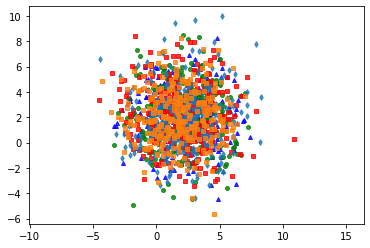

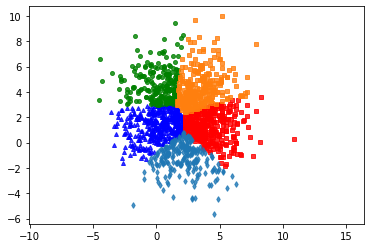

In [ ]:
kmeans_display(x, orig_labels)
kmeans_display(x, labels[-1])


In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
def kmean_assign_labels(x, centers):
  d = cdist(x, centers)
  return np.argmin(d, axis=1)

In [ ]:
def kmean_update_centers(x, labels, K):
  centers = np.zeros((K, x.shape[1]))
  for k in range(K):
    xk=x[labels==k, :]
    centers[k, :] = np.mean(xk, axis=0)
  return centers

In [ ]:
def ha_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [ ]:
def kmean(x, k):
  centers = [ kmeans_init_centers(x, k)]
  labels = []
  while True:
    labels.append(kmean_assign_labels(x, centers[-1]))
    new_centers = kmean_update_centers(x, labels[-1], k)
    if ha_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
  return (centers, labels)

In [ ]:
(b1, b2) = kmean(x, k)

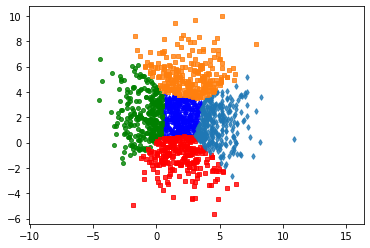

In [ ]:
kmeans_display(x, b2[-1])